In [4]:
import pandas as pd
import numpy as np
from glob import glob
import warnings
warnings.filterwarnings('ignore')

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

---
### 외국인 방문객 유동인구 데이터 (중국/중국 외)

In [7]:
fore = pd.read_csv("../JejuData/floating_foreigner.csv")
fore


,년월,국적,읍면동명,시도명,방문객수
0,2018-01,중국,건입동,제주시,30589.44
1,2018-01,중국 외,건입동,제주시,32542.06
2,2018-01,중국,구좌읍,제주시,26691.16
3,2018-01,중국 외,구좌읍,제주시,14845.87
4,2018-01,중국,남원읍,서귀포시,179846.03
...,...,...,...,...,...
3091,2020-12,중국 외,한림읍,제주시,1349.65
3092,2020-12,중국,화북동,제주시,35.49
3093,2020-12,중국 외,화북동,제주시,338.90
3094,2020-12,중국,효돈동,서귀포시,41.11


### 중국인

In [8]:
df_ch=fore[fore['국적']=='중국']
df_ch.rename(columns={'방문객수':'중국인'},inplace=True)
df_ch.drop(columns=['국적','시도명'],inplace=True)
df_ch

,년월,읍면동명,중국인
0,2018-01,건입동,30589.44
2,2018-01,구좌읍,26691.16
4,2018-01,남원읍,179846.03
6,2018-01,노형동,145583.19
8,2018-01,대륜동,22743.85
...,...,...,...
3086,2020-12,표선면,146.92
3088,2020-12,한경면,41.86
3090,2020-12,한림읍,331.76
3092,2020-12,화북동,35.49


### 중국 외

In [9]:
df_ot=fore[fore['국적']!='중국']
df_ot.rename(columns={'방문객수':'중국 외'},inplace=True)
df_ot.drop(columns=['국적','시도명'],inplace=True)
df_ot

,년월,읍면동명,중국 외
1,2018-01,건입동,32542.06
3,2018-01,구좌읍,14845.87
5,2018-01,남원읍,22754.32
7,2018-01,노형동,31173.26
9,2018-01,대륜동,12868.88
...,...,...,...
3087,2020-12,표선면,2106.80
3089,2020-12,한경면,2378.70
3091,2020-12,한림읍,1349.65
3093,2020-12,화북동,338.90


### 국적 구분 -> 컬럼으로 변경

In [10]:
df_f=pd.merge(df_ch,df_ot,on=['년월','읍면동명'],how='inner')
df_f

,년월,읍면동명,중국인,중국 외
0,2018-01,건입동,30589.44,32542.06
1,2018-01,구좌읍,26691.16,14845.87
2,2018-01,남원읍,179846.03,22754.32
3,2018-01,노형동,145583.19,31173.26
4,2018-01,대륜동,22743.85,12868.88
...,...,...,...,...
1543,2020-12,표선면,146.92,2106.80
1544,2020-12,한경면,41.86,2378.70
1545,2020-12,한림읍,331.76,1349.65
1546,2020-12,화북동,35.49,338.90


### 유동인구 비율 대비 지역별 인기있는 업종 추천 데이터

In [11]:
files=glob('../JejuData/Jeju_Card_2017_2021/*.csv')
files

['../JejuData/Jeju_Card_2017_2021/제주특별자치도_주제8_유동인구 비율 대비 지역별 인기있는 업종 추천 데이터_매쉬업결과_20.csv',
 '../JejuData/Jeju_Card_2017_2021/제주특별자치도_주제8_유동인구 비율 대비 지역별 인기있는 업종 추천 데이터_매쉬업결과_19.csv',
 '../JejuData/Jeju_Card_2017_2021/제주특별자치도_주제8_유동인구 비율 대비 지역별 인기있는 업종 추천 데이터_매쉬업결과_18.csv']

In [12]:
tmps=[]

for file_name in files:
    tmp=pd.read_csv(file_name,encoding='euc-kr')
    tmps.append(tmp)

sales=pd.concat(tmps)
sales.head(10)
sales.sort_values(by='년월',ascending=True)

,년월,시도명,읍면동명,업종명,이용자수,이용금액,총 유동인구,데이터기준일자
873,2018-01,제주시,용담2동,육류 소매업,866,42381480,1.824643e+07,2020-12-15
782,2018-01,제주시,오라동,기타음식료품위주종합소매업,29,1087010,1.941767e+07,2020-12-15
781,2018-01,제주시,오라동,기타 주점업,46,8990000,1.941767e+07,2020-12-15
780,2018-01,제주시,오라동,기타 외국식 음식점업,90,2536000,1.941767e+07,2020-12-15
779,2018-01,제주시,오라동,그외 기타 종합 소매업,3165,137235210,1.941767e+07,2020-12-15
...,...,...,...,...,...,...,...,...
13262,2020-12,제주시,화북동,"피자, 햄버거, 샌드위치 및 유사 음식점업",2335,47168390,2.754917e+07,2021-07-28
13261,2020-12,제주시,화북동,한식 음식점업,11416,400014079,2.754917e+07,2021-07-28
13260,2020-12,제주시,화북동,화장품 및 방향제 소매업,146,17058020,2.754917e+07,2021-07-28
13313,2020-12,제주시,일도2동,수산물 소매업,360,33048350,2.941000e+07,2021-07-28


In [13]:
type_list=['서양식 음식점업', '기타 외국식 음식점업', '피자, 햄버거, 샌드위치 및 유사 음식점업', '한식 음식점업', '일식 음식점업', '중식 음식점업', '비알콜 음료점업']
df=sales[sales['업종명'].isin(type_list)]
df

,년월,시도명,읍면동명,업종명,이용자수,이용금액,총 유동인구,데이터기준일자
5,2020-01,서귀포시,남원읍,기타 외국식 음식점업,57,1283000,16801997.61,2020-12-15
8,2020-01,서귀포시,남원읍,비알콜 음료점업,1285,15136220,16801997.61,2020-12-15
10,2020-01,서귀포시,남원읍,서양식 음식점업,3830,83475640,16801997.61,2020-12-15
18,2020-01,서귀포시,남원읍,일식 음식점업,616,61091000,16801997.61,2020-12-15
20,2020-01,서귀포시,남원읍,중식 음식점업,678,18712500,16801997.61,2020-12-15
...,...,...,...,...,...,...,...,...
14079,2018-12,제주시,화북동,서양식 음식점업,535,10957700,25768731.07,2020-12-15
14086,2018-12,제주시,화북동,일식 음식점업,156,15885000,25768731.07,2020-12-15
14088,2018-12,제주시,화북동,중식 음식점업,1064,29023620,25768731.07,2020-12-15
14092,2018-12,제주시,화북동,"피자, 햄버거, 샌드위치 및 유사 음식점업",2818,59523308,25768731.07,2020-12-15


In [14]:
df2=df[['년월','읍면동명','업종명','이용금액']]
df2

,년월,읍면동명,업종명,이용금액
5,2020-01,남원읍,기타 외국식 음식점업,1283000
8,2020-01,남원읍,비알콜 음료점업,15136220
10,2020-01,남원읍,서양식 음식점업,83475640
18,2020-01,남원읍,일식 음식점업,61091000
20,2020-01,남원읍,중식 음식점업,18712500
...,...,...,...,...
14079,2018-12,화북동,서양식 음식점업,10957700
14086,2018-12,화북동,일식 음식점업,15885000
14088,2018-12,화북동,중식 음식점업,29023620
14092,2018-12,화북동,"피자, 햄버거, 샌드위치 및 유사 음식점업",59523308


## 매출이 0인 업종, 읍면동 추가

In [15]:
dict_tmp={}
dict_tmp['년월']=[]
dict_tmp['읍면동명']=[]
dict_tmp['업종명']=[]
dict_tmp['이용금액']=[]
for year in df2['년월'].unique():
    for dong in df2['읍면동명'].unique():
        for shop in df2['업종명'].unique():
            if df2[(df2['년월']==year) & (df2['읍면동명']==dong) & (df2['업종명']==shop)].shape[0]==0:
                dict_tmp['년월'].append(year)
                dict_tmp['읍면동명'].append(dong)
                dict_tmp['업종명'].append(shop)
                dict_tmp['이용금액'].append(0)

pd.DataFrame(dict_tmp)

,년월,읍면동명,업종명,이용금액
0,2020-01,영천동,기타 외국식 음식점업,0
1,2020-01,영천동,일식 음식점업,0
2,2020-01,영천동,"피자, 햄버거, 샌드위치 및 유사 음식점업",0
3,2020-01,구좌읍,기타 외국식 음식점업,0
4,2020-01,도두동,"피자, 햄버거, 샌드위치 및 유사 음식점업",0
...,...,...,...,...
518,2018-12,추자면,비알콜 음료점업,0
519,2018-12,추자면,서양식 음식점업,0
520,2018-12,추자면,일식 음식점업,0
521,2018-12,추자면,"피자, 햄버거, 샌드위치 및 유사 음식점업",0


In [16]:
aggr2=pd.concat([df2,pd.DataFrame(dict_tmp)]).sort_values(by=['년월','읍면동명','업종명'])
aggr2.head()

,년월,읍면동명,업종명,이용금액
469,2018-01,건입동,기타 외국식 음식점업,9036400
473,2018-01,건입동,비알콜 음료점업,8264020
475,2018-01,건입동,서양식 음식점업,66781910
483,2018-01,건입동,일식 음식점업,86571700
485,2018-01,건입동,중식 음식점업,10550000


### 방문자수 추가

In [17]:
# 읍면동별 이용자수
kor=sales.groupby(by=['년월','읍면동명']).sum()[['이용자수','이용금액']]
kor.reset_index(inplace=True)
kor=kor[['년월','읍면동명','이용자수']]
kor.columns=['년월','읍면동명','방문자수']
kor

,년월,읍면동명,방문자수
0,2018-01,건입동,57061
1,2018-01,구좌읍,63235
2,2018-01,남원읍,54559
3,2018-01,노형동,354703
4,2018-01,대륜동,81061
...,...,...,...
1543,2020-12,표선면,52320
1544,2020-12,한경면,28329
1545,2020-12,한림읍,89958
1546,2020-12,화북동,67203


In [18]:
df_merged=pd.merge(aggr2,df_f,how='outer',on=['년월','읍면동명'])
df_merged=pd.merge(df_merged,kor,how='inner',on=['년월','읍면동명'])
# df_merged['월']=[y.split('-')[1] for y in df_merged['년월']]
df_merged['연도']=[y.split('-')[0] for y in df_merged['년월']]
df_merged['외국인']=[c+o for c,o in zip(df_merged['중국인'],df_merged['중국 외'])]
# df_merged=df_merged[['연도','월','읍면동명','업종명','이용금액','방문자수','중국인','중국 외','외국인']]
df_merged=df_merged[['년월','읍면동명','업종명','이용금액','방문자수','중국인','중국 외','외국인']]
df_merged

,년월,읍면동명,업종명,이용금액,방문자수,중국인,중국 외,외국인
0,2018-01,건입동,기타 외국식 음식점업,9036400,57061,30589.44,32542.06,63131.50
1,2018-01,건입동,비알콜 음료점업,8264020,57061,30589.44,32542.06,63131.50
2,2018-01,건입동,서양식 음식점업,66781910,57061,30589.44,32542.06,63131.50
3,2018-01,건입동,일식 음식점업,86571700,57061,30589.44,32542.06,63131.50
4,2018-01,건입동,중식 음식점업,10550000,57061,30589.44,32542.06,63131.50
...,...,...,...,...,...,...,...,...
10831,2020-12,효돈동,서양식 음식점업,25371750,16671,41.11,32.54,73.65
10832,2020-12,효돈동,일식 음식점업,8581000,16671,41.11,32.54,73.65
10833,2020-12,효돈동,중식 음식점업,18268000,16671,41.11,32.54,73.65
10834,2020-12,효돈동,"피자, 햄버거, 샌드위치 및 유사 음식점업",842540,16671,41.11,32.54,73.65


## 업종명 변경 (간소화)

In [19]:
types=[]
for res in df_merged['업종명']:
    if res=='일반유흥 주점업':
        types.append('유흥주점')
    elif res=='기타 주점업':
        types.append('주점')
    elif res=='비알콜 음료점업':
        types.append('음료')
    elif res=='서양식 음식점업':
        types.append('양식')
    elif res=='기타 외국식 음식점업':
        types.append('외국음식')
    elif res=='일식 음식점업':
        types.append('일식')
    elif res=='피자, 햄버거, 샌드위치 및 유사 음식점업':
        types.append('패스트푸드')
    elif res=='한식 음식점업':
        types.append('한식')
    elif res=='중식 음식점업':
        types.append('중식')
df_merged['업종명']=types

In [20]:
df_merged

,년월,읍면동명,업종명,이용금액,방문자수,중국인,중국 외,외국인
0,2018-01,건입동,외국음식,9036400,57061,30589.44,32542.06,63131.50
1,2018-01,건입동,음료,8264020,57061,30589.44,32542.06,63131.50
2,2018-01,건입동,양식,66781910,57061,30589.44,32542.06,63131.50
3,2018-01,건입동,일식,86571700,57061,30589.44,32542.06,63131.50
4,2018-01,건입동,중식,10550000,57061,30589.44,32542.06,63131.50
...,...,...,...,...,...,...,...,...
10831,2020-12,효돈동,양식,25371750,16671,41.11,32.54,73.65
10832,2020-12,효돈동,일식,8581000,16671,41.11,32.54,73.65
10833,2020-12,효돈동,중식,18268000,16671,41.11,32.54,73.65
10834,2020-12,효돈동,패스트푸드,842540,16671,41.11,32.54,73.65


# MACHINE LEARNING

In [21]:
df_merged

,년월,읍면동명,업종명,이용금액,방문자수,중국인,중국 외,외국인
0,2018-01,건입동,외국음식,9036400,57061,30589.44,32542.06,63131.50
1,2018-01,건입동,음료,8264020,57061,30589.44,32542.06,63131.50
2,2018-01,건입동,양식,66781910,57061,30589.44,32542.06,63131.50
3,2018-01,건입동,일식,86571700,57061,30589.44,32542.06,63131.50
4,2018-01,건입동,중식,10550000,57061,30589.44,32542.06,63131.50
...,...,...,...,...,...,...,...,...
10831,2020-12,효돈동,양식,25371750,16671,41.11,32.54,73.65
10832,2020-12,효돈동,일식,8581000,16671,41.11,32.54,73.65
10833,2020-12,효돈동,중식,18268000,16671,41.11,32.54,73.65
10834,2020-12,효돈동,패스트푸드,842540,16671,41.11,32.54,73.65


In [22]:
# df = df_merged.copy()
# df['년월'] = df['년월'].str.replace("-",".")
# df['년월'] = df['년월'].str[2:]
# df

In [23]:
df_onehot=df_merged.copy()
df_onehot['읍면동명'] = df_onehot['읍면동명'].str.replace("1","일")
df_onehot['읍면동명'] = df_onehot['읍면동명'].str.replace("2","이")
df_onehot['읍면동명'].unique()

array(['건입동', '구좌읍', '남원읍', '노형동', '대륜동', '대정읍', '대천동', '도두동', '동홍동',
       '봉개동', '삼도일동', '삼도이동', '삼양동', '서홍동', '성산읍', '송산동', '아라동', '안덕면',
       '애월읍', '연동', '영천동', '예래동', '오라동', '외도동', '용담일동', '용담이동', '우도면',
       '이도일동', '이도이동', '이호동', '일도일동', '일도이동', '정방동', '조천읍', '중문동', '중앙동',
       '천지동', '추자면', '표선면', '한경면', '한림읍', '화북동', '효돈동'], dtype=object)

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

df_onehot=df_merged.copy()
df_onehot['읍면동명'] = df_onehot['읍면동명'].str.replace("1","일")
df_onehot['읍면동명'] = df_onehot['읍면동명'].str.replace("2","이")
df_onehot['읍면동명'].unique()
# df_onehot['월']=[ym.split('-')[1] for ym in df_onehot['년월']]
for column in ['읍면동명','업종명']:
    df_total2=pd.get_dummies(df_onehot[column],prefix=column)
    df_onehot=pd.concat([df_onehot,df_total2],axis=1)
# df_onehot.drop(columns=['연도','월','읍면동명','업종명','외국인','중국 외','방문자수','중국인'],inplace=True)
df_onehot.drop(columns=['년월','읍면동명','업종명','외국인','중국 외'],inplace=True)
df_onehot


,이용금액,방문자수,중국인,읍면동명_건입동,읍면동명_구좌읍,읍면동명_남원읍,읍면동명_노형동,읍면동명_대륜동,읍면동명_대정읍,읍면동명_대천동,...,읍면동명_한림읍,읍면동명_화북동,읍면동명_효돈동,업종명_양식,업종명_외국음식,업종명_음료,업종명_일식,업종명_중식,업종명_패스트푸드,업종명_한식
0,9036400,57061,30589.44,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,8264020,57061,30589.44,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,66781910,57061,30589.44,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,86571700,57061,30589.44,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,10550000,57061,30589.44,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10831,25371750,16671,41.11,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
10832,8581000,16671,41.11,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
10833,18268000,16671,41.11,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
10834,842540,16671,41.11,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [25]:
# df_onehot['월'] = df_onehot['월'].astype('int')
# df_onehot

## 이용금액 0인 샘플 점검

### 결측치 처리 가이드 라인
- 10% 미만
    - 삭제 or 대치
- 10% ~ 50%
    - regression or model based imputation
- 50% 이상
    - 해당 컬럼(변수) 자체 제거


In [26]:
# df_onehot[df_onehot['이용금액']==0]
df_onehot = df_onehot[df_onehot['이용금액']!=0]


In [27]:
523/10836

0.048265042451088966

In [28]:
df_onehot

,이용금액,방문자수,중국인,읍면동명_건입동,읍면동명_구좌읍,읍면동명_남원읍,읍면동명_노형동,읍면동명_대륜동,읍면동명_대정읍,읍면동명_대천동,...,읍면동명_한림읍,읍면동명_화북동,읍면동명_효돈동,업종명_양식,업종명_외국음식,업종명_음료,업종명_일식,업종명_중식,업종명_패스트푸드,업종명_한식
0,9036400,57061,30589.44,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,8264020,57061,30589.44,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,66781910,57061,30589.44,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,86571700,57061,30589.44,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,10550000,57061,30589.44,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10831,25371750,16671,41.11,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
10832,8581000,16671,41.11,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
10833,18268000,16671,41.11,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
10834,842540,16671,41.11,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


## 코로나 (특이 데이터) 점검

In [29]:
# pd.options.display.float_format = '{:.5f}'.format
# print(df_onehot['중국인'].describe())
# print(df_onehot['방문자수'].describe())

In [30]:
# 2020년 데이터 점검
# df_onehot = df_onehot[(df_onehot['중국인']<=64088.8)&(df_onehot['중국인']>=2654.84)&(df_onehot['방문자수']>=2575)&(df_onehot['방문자수']<=140666)]

In [31]:
np.set_printoptions(precision=6, suppress=True)

## RandomForest Regressor 학습

In [32]:
train_input,test_input,train_target,test_target=train_test_split(df_onehot.iloc[:,1:],df_onehot[['이용금액']],test_size=0.2, random_state=42)
sub_input,val_input,sub_target,val_target=train_test_split(train_input,train_target,test_size=0.2,random_state=42)

rf=RandomForestRegressor()


scores={}
scores['Train']=[]
scores['Valid']=[]
scores['Test']=[]

rf.fit(sub_input,sub_target)
scores['Train'].append(rf.score(sub_input,sub_target))
scores['Valid'].append(rf.score(val_input,val_target))
scores['Test'].append(rf.score(test_input,test_target))

In [33]:
scores

{'Train': [0.9985294420459142],
 'Valid': [0.9882632125867713],
 'Test': [0.992322978488914]}

In [34]:
# 세트별 크기
print('Train:',sub_input.shape)
print('Valid:',val_input.shape)
print('Test:',test_input.shape)

Train: (6600, 52)
Valid: (1650, 52)
Test: (2063, 52)


### 교차검증

In [35]:
# 교차 검증
from sklearn.model_selection import cross_validate
cv_scores = cross_validate(rf,sub_input,sub_target)
cv_scores

{'fit_time': array([1.015422, 1.025317, 0.994101, 0.993641, 1.001512]),
 'score_time': array([0.024951, 0.023703, 0.021626, 0.021935, 0.021359]),
 'test_score': array([0.992883, 0.988879, 0.991695, 0.991111, 0.980699])}

In [36]:
# 교차검증 후 정확도 판단
import numpy as np
np.mean(cv_scores['test_score'])

0.9890534352403533

## K-Fold 검증

In [37]:
from sklearn.model_selection import StratifiedKFold
splitter = StratifiedKFold()
kf_scores = cross_validate(rf,sub_input,sub_target)
kf_scores

{'fit_time': array([0.996738, 1.01436 , 0.990989, 1.000401, 1.010564]),
 'score_time': array([0.021649, 0.021628, 0.021518, 0.021994, 0.022275]),
 'test_score': array([0.992628, 0.988978, 0.991719, 0.990618, 0.980404])}

In [38]:
np.mean(kf_scores['test_score'])

0.9888694462119434

In [39]:
# KFold의 Fold중 10개로 나누어서 교차검증
splitter = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
kf_10_scores = cross_validate(rf,sub_input,sub_target)
kf_10_scores

{'fit_time': array([1.014107, 1.015141, 1.005438, 1.000824, 1.007373]),
 'score_time': array([0.022761, 0.021994, 0.021273, 0.02136 , 0.022454]),
 'test_score': array([0.992758, 0.989342, 0.992054, 0.990916, 0.980828])}

## Grid Search로 최적의 hyper parameter 찾기

In [40]:
from sklearn.model_selection import GridSearchCV
params = {'min_impurity_decrease':[0.0001,0.0002,0.0003,0.0004,0.0005]}

In [41]:
gs = GridSearchCV(RandomForestRegressor(random_state=42),params,n_jobs=-1)
gs.fit(sub_input,sub_target)

/Users/ethan/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ethan/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ethan/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ethan/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: 

GridSearchCV(estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [42]:
rfr = gs.best_estimator_
print('Train:',rfr.score(sub_input,sub_target))
print('Valid:',rfr.score(val_input,val_target))
print('Test:',rfr.score(test_input,test_target))

Train: 0.9985781799499738
Valid: 0.9880196129794235
Test: 0.9924487434039235


In [43]:
gs.best_params_

{'min_impurity_decrease': 0.0001}

In [44]:
df_onehot

,이용금액,방문자수,중국인,읍면동명_건입동,읍면동명_구좌읍,읍면동명_남원읍,읍면동명_노형동,읍면동명_대륜동,읍면동명_대정읍,읍면동명_대천동,...,읍면동명_한림읍,읍면동명_화북동,읍면동명_효돈동,업종명_양식,업종명_외국음식,업종명_음료,업종명_일식,업종명_중식,업종명_패스트푸드,업종명_한식
0,9036400,57061,30589.44,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,8264020,57061,30589.44,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,66781910,57061,30589.44,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,86571700,57061,30589.44,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,10550000,57061,30589.44,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10831,25371750,16671,41.11,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
10832,8581000,16671,41.11,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
10833,18268000,16671,41.11,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
10834,842540,16671,41.11,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


## Model Save & Load

In [45]:
# 모델 저장하기
import joblib
# filename = '../JejuData/rf_jeju.h5'
filename = "/Users/ethan/Development/Jeju_Project/jeju_ml/rf_jeju.h5"
# joblib.dump(rf,filename)
joblib.dump(rfr,filename)

['/Users/ethan/Development/Jeju_Project/jeju_ml/rf_jeju.h5']

In [46]:
# ml = joblib.load("../JejuData/rf_jeju.h5")
ml = joblib.load("/Users/ethan/Development/Jeju_Project/jeju_ml/rf_jeju.h5")


In [47]:
df_onehot.columns

Index(['이용금액', '방문자수', '중국인', '읍면동명_건입동', '읍면동명_구좌읍', '읍면동명_남원읍', '읍면동명_노형동',
       '읍면동명_대륜동', '읍면동명_대정읍', '읍면동명_대천동', '읍면동명_도두동', '읍면동명_동홍동', '읍면동명_봉개동',
       '읍면동명_삼도이동', '읍면동명_삼도일동', '읍면동명_삼양동', '읍면동명_서홍동', '읍면동명_성산읍',
       '읍면동명_송산동', '읍면동명_아라동', '읍면동명_안덕면', '읍면동명_애월읍', '읍면동명_연동', '읍면동명_영천동',
       '읍면동명_예래동', '읍면동명_오라동', '읍면동명_외도동', '읍면동명_용담이동', '읍면동명_용담일동',
       '읍면동명_우도면', '읍면동명_이도이동', '읍면동명_이도일동', '읍면동명_이호동', '읍면동명_일도이동',
       '읍면동명_일도일동', '읍면동명_정방동', '읍면동명_조천읍', '읍면동명_중문동', '읍면동명_중앙동', '읍면동명_천지동',
       '읍면동명_추자면', '읍면동명_표선면', '읍면동명_한경면', '읍면동명_한림읍', '읍면동명_화북동', '읍면동명_효돈동',
       '업종명_양식', '업종명_외국음식', '업종명_음료', '업종명_일식', '업종명_중식', '업종명_패스트푸드',
       '업종명_한식'],
      dtype='object')

In [48]:
# 행정동 One-Hot Encoding
dong_list = ['건입동', '구좌읍', '남원읍', '노형동', '대륜동', '대정읍', '대천동', '도두동', '동홍동', '봉개동', '삼도이동',
                 '삼도일동', '삼양동', '서홍동', '성산읍', '송산동', '아라동', '안덕면', '애월읍', '연동', '영천동', '예래동',
                 '오라동', '외도동', '용담이동', '용담일동', '우도면', '이도이동', '이도일동', '이호동', '일도이동', '일도일동', '정방동',
                 '조천읍', '중문동', '중앙동', '천지동', '추자면', '표선면', '한경면', '한림읍', '화북동', '효돈동']
dong_index = dong_list.index('건입동')
dong_onehot = [
        [0 if i != dong_index else 1 for i in range(len(dong_list))]]

    # 업종 One-Hot Encoding
category_list = ['양식', '외국음식', '음료', '일식', '중식', '패스트푸드', '한식']
category_index = category_list.index('양식')
category_onehot = [
        [0 if i != category_index else 1 for i in range(len(category_list))]]

dong_onehot = pd.DataFrame(dong_onehot)
category_onehot = pd.DataFrame(category_onehot)
visits = pd.DataFrame(np.array([[20000,30000]]))
# month = pd.DataFrame(np.array([[2]]))
features = pd.concat([visits,dong_onehot,category_onehot],axis=1)


In [49]:
features

,0,1,0,1,2,3,4,5,6,7,...,40,41,42,0,1,2,3,4,5,6
0,20000,30000,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [50]:
rfr.predict(features)

array([15773126.37])

In [51]:
ml.predict(features)

array([15773126.37])

In [52]:
# 행정동 One-Hot Encoding
dong_list = ['건입동', '구좌읍', '남원읍', '노형동', '대륜동', '대정읍', '대천동', '도두동', '동홍동', '봉개동', '삼도이동',
                 '삼도일동', '삼양동', '서홍동', '성산읍', '송산동', '아라동', '안덕면', '애월읍', '연동', '영천동', '예래동',
                 '오라동', '외도동', '용담이동', '용담일동', '우도면', '이도이동', '이도일동', '이호동', '일도이동', '일도일동', '정방동',
                 '조천읍', '중문동', '중앙동', '천지동', '추자면', '표선면', '한경면', '한림읍', '화북동', '효돈동']
dong_index = dong_list.index('중문동')
dong_onehot = [
        [0 if i != dong_index else 1 for i in range(len(dong_list))]]

    # 업종 One-Hot Encoding
category_list = ['양식', '외국음식', '음료', '일식', '중식', '패스트푸드', '한식']
category_index = category_list.index('일식')
category_onehot = [
        [0 if i != category_index else 1 for i in range(len(category_list))]]

dong_onehot = pd.DataFrame(dong_onehot)
category_onehot = pd.DataFrame(category_onehot)
visits = pd.DataFrame(np.array([[30000,20000]]))
# month = pd.DataFrame(np.array([[8]]))
features = pd.concat([visits,dong_onehot,category_onehot],axis=1)
ml.predict(features)


array([17546371.])

In [53]:
features

,0,1,0,1,2,3,4,5,6,7,...,40,41,42,0,1,2,3,4,5,6
0,30000,20000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [54]:
df_onehot

,이용금액,방문자수,중국인,읍면동명_건입동,읍면동명_구좌읍,읍면동명_남원읍,읍면동명_노형동,읍면동명_대륜동,읍면동명_대정읍,읍면동명_대천동,...,읍면동명_한림읍,읍면동명_화북동,읍면동명_효돈동,업종명_양식,업종명_외국음식,업종명_음료,업종명_일식,업종명_중식,업종명_패스트푸드,업종명_한식
0,9036400,57061,30589.44,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,8264020,57061,30589.44,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,66781910,57061,30589.44,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,86571700,57061,30589.44,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,10550000,57061,30589.44,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10831,25371750,16671,41.11,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
10832,8581000,16671,41.11,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
10833,18268000,16671,41.11,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
10834,842540,16671,41.11,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


{'whiskers': [<matplotlib.lines.Line2D at 0x15f8f66d0>,
 'caps': [<matplotlib.lines.Line2D at 0x15f8f6c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x15f8f6430>],
 'medians': [<matplotlib.lines.Line2D at 0x15f90a190>],
 'fliers': [<matplotlib.lines.Line2D at 0x15f90a430>],
 'means': []}

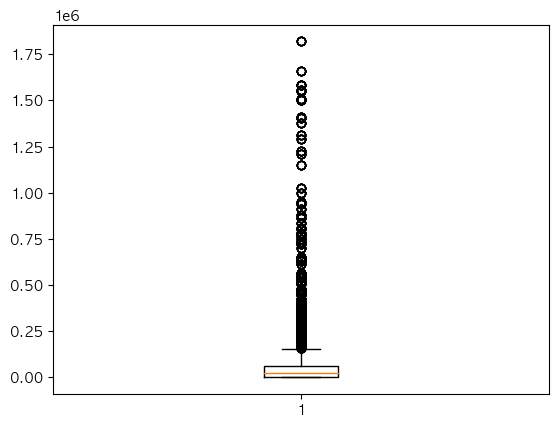

In [55]:
plt.boxplot(df_onehot['중국인'])

{'whiskers': [<matplotlib.lines.Line2D at 0x15fa1bd00>,
 'caps': [<matplotlib.lines.Line2D at 0x15fa2a280>,
 'boxes': [<matplotlib.lines.Line2D at 0x15fa1ba60>],
 'medians': [<matplotlib.lines.Line2D at 0x15fa2a610>],
 'fliers': [<matplotlib.lines.Line2D at 0x15fa2a8b0>],
 'means': []}

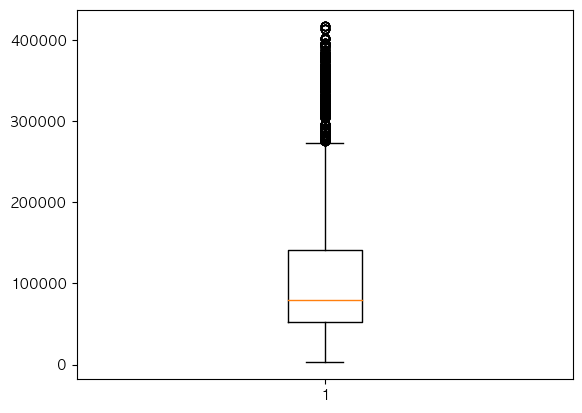

In [56]:
plt.boxplot(df_onehot['방문자수'])

### 행정동별 매장수 데이터 (2017-02~2020-03)

In [57]:
pd.read_csv("../JejuData/제주특별자치도_주제1_제주 예비창업자를 위한 업종별 카드 매출과 매장수 데이터 활용_매쉬업결과_20201215.csv",encoding='euc-kr')

,년월,시도명,지역구분,읍면동명,업종코드,업종명,이용자 구분,관광구분,연령대,성별,이용자수,이용건수,이용금액,매장수,업종명 대분류,데이터기준일자
0,2017-02,서귀포시,도심,강정동,G47121,슈퍼마켓,내국인,개별,20.0,여성,5,5,52150,215,소매업,2020-12-15
1,2017-02,서귀포시,도심,강정동,G47121,슈퍼마켓,내국인,개별,30.0,여성,5,5,44550,215,소매업,2020-12-15
2,2017-02,서귀포시,도심,강정동,G47121,슈퍼마켓,내국인,개별,50.0,남성,35,41,721350,215,소매업,2020-12-15
3,2017-02,서귀포시,도심,강정동,G47121,슈퍼마켓,내국인,단체,30.0,여성,13,15,241990,215,소매업,2020-12-15
4,2017-02,서귀포시,도심,강정동,G47121,슈퍼마켓,법인,단체,NaN,알수없음,9,11,4495700,215,소매업,2020-12-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1642614,2020-03,제주시,읍면,한림읍,H50121,내항 여객 운송업,제주도민,도민,50.0,남성,13,13,478000,9,운송업,2020-12-15
1642615,2020-03,제주시,읍면,한림읍,H50121,내항 여객 운송업,제주도민,도민,60.0,여성,5,5,93500,9,운송업,2020-12-15
1642616,2020-03,제주시,읍면,한림읍,H50121,내항 여객 운송업,제주도민,도민,60.0,남성,6,6,177000,9,운송업,2020-12-15
1642617,2020-03,제주시,읍면,한림읍,H50121,내항 여객 운송업,제주도민,도민,70.0,여성,1,1,29000,9,운송업,2020-12-15


In [58]:
df_merged['방문자수'].describe()

count     10836.000000
mean     104369.873385
std       87995.204409
min        2575.000000
25%       49607.750000
50%       75567.000000
75%      137361.500000
max      416702.000000
Name: 방문자수, dtype: float64

In [59]:
df_merged['중국인'].describe()

count    1.083600e+04
mean     8.044343e+04
std      1.948253e+05
min      4.200000e-01
25%      2.694297e+03
50%      2.165039e+04
75%      6.170294e+04
max      1.818955e+06
Name: 중국인, dtype: float64

In [60]:
business = pd.read_csv("../JejuData/number_of_business.csv",encoding='euc-kr')

In [61]:
len(business['읍면동명'].unique())

72

In [62]:
business

,년월,시도명,지역구분,읍면동명,업종코드,업종명,이용자 구분,관광구분,연령대,성별,이용금액,매장수,업종명 대분류,데이터기준일자
0,2021-01,제주시,도심,삼도일동,S96121,욕탕업,법인,단체,NaN,알수없음,160000,61,서비스업,2021-07-26
1,2021-01,제주시,읍면,한림읍,S96121,욕탕업,내국인,개별,70.0,남성,10000,61,서비스업,2021-07-26
2,2021-01,제주시,읍면,구좌읍,S96121,욕탕업,제주도민,도민,40.0,남성,15000,61,서비스업,2021-07-26
3,2021-01,제주시,도심,도두일동,S96121,욕탕업,법인,단체,NaN,알수없음,56000,61,서비스업,2021-07-26
4,2021-01,제주시,도심,삼도이동,S96121,욕탕업,제주도민,도민,70.0,남성,1154000,61,서비스업,2021-07-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193850,2021-05,서귀포시,도심,하예동,G47121,슈퍼마켓,제주도민,도민,20.0,여성,7800,189,소매업,2021-07-26
193851,2021-05,서귀포시,도심,서홍동,G47121,슈퍼마켓,내국인,단체,40.0,남성,10900,189,소매업,2021-07-26
193852,2021-05,서귀포시,읍면,남원읍,G47121,슈퍼마켓,내국인,개별,60.0,남성,1106360,189,소매업,2021-07-26
193853,2021-05,서귀포시,도심,동홍동,G47121,슈퍼마켓,기타외국,단체,NaN,알수없음,340730,189,소매업,2021-07-26


In [63]:
business['업종명'].unique()

array(['욕탕업', '관광 민예품 및 선물용품 소매업', '비알콜 음료점업', '수산물 소매업', '한식 음식점업',
       '호텔업', '여관업', '체인화 편의점', '서양식 음식점업', '중식 음식점업', '화장품 및 방향제 소매업',
       '피자, 햄버거, 샌드위치 및 유사 음식점업', '전시 및 행사 대행업', '차량용 가스 충전업',
       '빵 및 과자류 소매업', '기타음식료품위주종합소매업', '골프장 운영업', '차량용 주유소 운영업',
       '기타 대형 종합 소매업', '기타 주점업', '그외 기타 분류안된 오락관련 서비스업', '휴양콘도 운영업',
       '그외 기타 스포츠시설 운영업', '마사지업', '내항 여객 운송업', '건강보조식품 소매업', '면세점',
       '일반유흥 주점업', '택시 운송업', '기타 갬블링 및 베팅업', '정기 항공 운송업', '기타 수상오락 서비스업',
       '그외 기타 종합 소매업', '기타 외국식 음식점업', '육류 소매업', '일식 음식점업', '과실 및 채소 소매업',
       '자동차 임대업', '여행사업', '스포츠 및 레크레이션 용품 임대업', '슈퍼마켓'], dtype=object)

In [64]:
df_merged['읍면동명'].unique()

array(['건입동', '구좌읍', '남원읍', '노형동', '대륜동', '대정읍', '대천동', '도두동', '동홍동',
       '봉개동', '삼도1동', '삼도2동', '삼양동', '서홍동', '성산읍', '송산동', '아라동', '안덕면',
       '애월읍', '연동', '영천동', '예래동', '오라동', '외도동', '용담1동', '용담2동', '우도면',
       '이도1동', '이도2동', '이호동', '일도1동', '일도2동', '정방동', '조천읍', '중문동', '중앙동',
       '천지동', '추자면', '표선면', '한경면', '한림읍', '화북동', '효돈동'], dtype=object)

In [65]:
# 제주
jeju = ['한림읍','애월읍','구좌읍','조천읍','한경면','추자면','우도면','일도일동','일도이동','이도일동','이도이동','삼도일동','삼도이동','용담일동','용담이동','건입동','화북동','삼양동','봉개동','아라동','오라동','연동','노형동','외도동','이호동','도두동']

# 제주시 한식
[368,402,275,343,115,25,65,78,258,113,572,121,136,99,162,107,130,132,32,221,104,624,478,172,31,94]


[368,
 402,
 275,
 343,
 115,
 25,
 65,
 78,
 258,
 113,
 572,
 121,
 136,
 99,
 162,
 107,
 130,
 132,
 32,
 221,
 104,
 624,
 478,
 172,
 31,
 94]

---

In [66]:
jejures = pd.read_csv("../JejuData/jejures.csv")
jejures = jejures[jejures['상세영업상태명']=='영업']

In [67]:
jejures.columns

Index(['번호', '개방서비스명', '개방서비스아이디', '개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자',
       '영업상태구분코드', '영업상태명', '상세영업상태코드', '상세영업상태명', '폐업일자', '휴업시작일자', '휴업종료일자',
       '재개업일자', '소재지전화', '소재지면적', '소재지우편번호', '소재지전체주소', '도로명전체주소', '도로명우편번호',
       '사업장명', '최종수정시점', '데이터갱신구분', '데이터갱신일자', '업태구분명', '좌표정보(x)', '좌표정보(y)',
       '위생업태명', '남성종사자수', '여성종사자수', '영업장주변구분명', '등급구분명', '급수시설구분명', '총직원수',
       '본사직원수', '공장사무직직원수', '공장판매직직원수', '공장생산직직원수', '건물소유구분명', '보증액', '월세액',
       '다중이용업소여부', '시설총규모', '전통업소지정번호', '전통업소주된음식', '홈페이지', 'Unnamed: 47'],
      dtype='object')

In [68]:
jejures.columns
jejures = jejures[['사업장명','업태구분명','좌표정보(x)','좌표정보(y)','시설총규모', '소재지면적','소재지전체주소']]

In [69]:
jejures

,사업장명,업태구분명,좌표정보(x),좌표정보(y),시설총규모,소재지면적,소재지전체주소
0,카페송키,기타,155346.157881,2179.442681,80.14,80.14,제주특별자치도 제주시 삼도이동 1120-2
1,에릭스에스프레소,기타,186814.902959,2782.646778,27.00,27.00,제주특별자치도 제주시 구좌읍 세화리 1397-6번지
2,일품순두부한림점,한식,131789.099975,-8313.221197,152.00,152.00,제주특별자치도 제주시 한림읍 대림리 1845-2번지
3,김복남맥주제주아라점,식육(숯불구이),157718.600964,-2679.091712,82.00,82.00,제주특별자치도 제주시 아라일동 6139
4,봉플라봉뱅,기타,153262.205384,-817.646591,58.94,58.94,제주특별자치도 제주시 연동 312-57번지 정인하우스
...,...,...,...,...,...,...,...
30185,노바운더리,중국식,179779.528784,-10481.113944,152.37,152.37,제주특별자치도 서귀포시 표선면 성읍리 2375-1
30186,모먹젠,뷔페식,130234.730514,-29719.509734,536.82,536.82,제주특별자치도 서귀포시 대정읍 하모리 1414-1
30187,일품양평해장국,한식,173850.221355,-23739.830024,112.40,112.40,제주특별자치도 서귀포시 남원읍 남원리 217-5
30188,원쭈꾸미,한식,173328.540735,-24300.890322,98.02,98.02,제주특별자치도 서귀포시 남원읍 남원리 1362-7


In [70]:
len(jejures)

15461

In [71]:
jejures['소재지전체주소'] = jejures['소재지전체주소'].astype('str')

In [72]:
jejures['소재지주소']=[j.split(" ") for j in jejures['소재지전체주소']]

In [73]:
jejures['소재지주소'][0][2]

'삼도이동'

In [74]:
len(jejures)

15461

In [75]:
# sum(jejures['소재지주소'].isna())

In [76]:
jejures

,사업장명,업태구분명,좌표정보(x),좌표정보(y),시설총규모,소재지면적,소재지전체주소,소재지주소
0,카페송키,기타,155346.157881,2179.442681,80.14,80.14,제주특별자치도 제주시 삼도이동 1120-2,"[제주특별자치도, 제주시, 삼도이동, 1120-2]"
1,에릭스에스프레소,기타,186814.902959,2782.646778,27.00,27.00,제주특별자치도 제주시 구좌읍 세화리 1397-6번지,"[제주특별자치도, 제주시, 구좌읍, 세화리, 1397-6번지]"
2,일품순두부한림점,한식,131789.099975,-8313.221197,152.00,152.00,제주특별자치도 제주시 한림읍 대림리 1845-2번지,"[제주특별자치도, 제주시, 한림읍, 대림리, 1845-2번지]"
3,김복남맥주제주아라점,식육(숯불구이),157718.600964,-2679.091712,82.00,82.00,제주특별자치도 제주시 아라일동 6139,"[제주특별자치도, 제주시, 아라일동, 6139]"
4,봉플라봉뱅,기타,153262.205384,-817.646591,58.94,58.94,제주특별자치도 제주시 연동 312-57번지 정인하우스,"[제주특별자치도, 제주시, 연동, 312-57번지, 정인하우스]"
...,...,...,...,...,...,...,...,...
30185,노바운더리,중국식,179779.528784,-10481.113944,152.37,152.37,제주특별자치도 서귀포시 표선면 성읍리 2375-1,"[제주특별자치도, 서귀포시, 표선면, 성읍리, 2375-1]"
30186,모먹젠,뷔페식,130234.730514,-29719.509734,536.82,536.82,제주특별자치도 서귀포시 대정읍 하모리 1414-1,"[제주특별자치도, 서귀포시, 대정읍, 하모리, 1414-1]"
30187,일품양평해장국,한식,173850.221355,-23739.830024,112.40,112.40,제주특별자치도 서귀포시 남원읍 남원리 217-5,"[제주특별자치도, 서귀포시, 남원읍, 남원리, 217-5]"
30188,원쭈꾸미,한식,173328.540735,-24300.890322,98.02,98.02,제주특별자치도 서귀포시 남원읍 남원리 1362-7,"[제주특별자치도, 서귀포시, 남원읍, 남원리, 1362-7]"


In [77]:
jejures.iloc[15460]['소재지주소']

['제주특별자치도', '서귀포시', '동홍동', '512-11']

In [78]:
jejures.reset_index(inplace=True)

In [79]:
jejures.drop(columns='index',inplace=True)

In [80]:
for i in range(len(jejures)):
    if len(jejures['소재지주소'][i]) < 3:
        jejures.drop(index=i, inplace=True)

In [81]:
jejures['읍면동명']=[j[2] for j in jejures['소재지주소']]

In [82]:
jejures

,사업장명,업태구분명,좌표정보(x),좌표정보(y),시설총규모,소재지면적,소재지전체주소,소재지주소,읍면동명
0,카페송키,기타,155346.157881,2179.442681,80.14,80.14,제주특별자치도 제주시 삼도이동 1120-2,"[제주특별자치도, 제주시, 삼도이동, 1120-2]",삼도이동
1,에릭스에스프레소,기타,186814.902959,2782.646778,27.00,27.00,제주특별자치도 제주시 구좌읍 세화리 1397-6번지,"[제주특별자치도, 제주시, 구좌읍, 세화리, 1397-6번지]",구좌읍
2,일품순두부한림점,한식,131789.099975,-8313.221197,152.00,152.00,제주특별자치도 제주시 한림읍 대림리 1845-2번지,"[제주특별자치도, 제주시, 한림읍, 대림리, 1845-2번지]",한림읍
3,김복남맥주제주아라점,식육(숯불구이),157718.600964,-2679.091712,82.00,82.00,제주특별자치도 제주시 아라일동 6139,"[제주특별자치도, 제주시, 아라일동, 6139]",아라일동
4,봉플라봉뱅,기타,153262.205384,-817.646591,58.94,58.94,제주특별자치도 제주시 연동 312-57번지 정인하우스,"[제주특별자치도, 제주시, 연동, 312-57번지, 정인하우스]",연동
...,...,...,...,...,...,...,...,...,...
15456,노바운더리,중국식,179779.528784,-10481.113944,152.37,152.37,제주특별자치도 서귀포시 표선면 성읍리 2375-1,"[제주특별자치도, 서귀포시, 표선면, 성읍리, 2375-1]",표선면
15457,모먹젠,뷔페식,130234.730514,-29719.509734,536.82,536.82,제주특별자치도 서귀포시 대정읍 하모리 1414-1,"[제주특별자치도, 서귀포시, 대정읍, 하모리, 1414-1]",대정읍
15458,일품양평해장국,한식,173850.221355,-23739.830024,112.40,112.40,제주특별자치도 서귀포시 남원읍 남원리 217-5,"[제주특별자치도, 서귀포시, 남원읍, 남원리, 217-5]",남원읍
15459,원쭈꾸미,한식,173328.540735,-24300.890322,98.02,98.02,제주특별자치도 서귀포시 남원읍 남원리 1362-7,"[제주특별자치도, 서귀포시, 남원읍, 남원리, 1362-7]",남원읍


In [83]:
jejures = jejures[jejures['업태구분명'].isin(['한식','중국식','일식','까페','패스트푸드','경양식','외국음식전문점(인도,태국등)'])]

In [84]:
jejures.columns

Index(['사업장명', '업태구분명', '좌표정보(x)', '좌표정보(y)', '시설총규모', '소재지면적', '소재지전체주소',
       '소재지주소', '읍면동명'],
      dtype='object')

In [85]:
jejures = jejures[['읍면동명','업태구분명','사업장명','좌표정보(x)', '좌표정보(y)', '시설총규모', '소재지면적', '소재지전체주소',
       '소재지주소']]

In [86]:
jejures.columns = ['읍면동명','업종명','사업장명','좌표정보(x)', '좌표정보(y)', '시설총규모', '소재지면적', '소재지전체주소',
       '소재지주소']

In [87]:
jejures['읍면동명'].unique()

array(['한림읍', '도남동', '조천읍', '연동', '화북일동', '이도이동', '우도면', '삼도이동', '건입동',
       '구좌읍', '애월읍', '일도일동', '노형동', '아라이동', '삼양이동', '영평동', '일도이동', '한경면',
       '회천동', '오라이동', '이호일동', '아라일동', '추자면', '이도일동', '이호이동', '용담삼동',
       '삼도일동', '오라삼동', '용담일동', '봉개동', '외도일동', '해안동', '삼양일동', '도두일동',
       '오라일동', '용담이동', '도두이동', '도련이동', '도련일동', '외도이동', '삼양삼동', '월평동',
       '내도동', '오등동', '화북이동', '도평동', '용강동', '표선면', '서귀동', '성산읍', '안덕면',
       '대정읍', '법환동', '동홍동', '강정동', '남원읍', '토평동', '중문동', '색달동', '호근동',
       '서홍동', '서호동', '하효동', '하원동', '신효동', '하예동', '보목동', '대포동', '상예동',
       '상효동', '회수동', '도순동'], dtype=object)

In [88]:
jejures.sort_values(by='읍면동명',inplace=True)

In [89]:
jejures['읍면동명'].replace('도남동','이도이동',inplace=True)
jejures['읍면동명'].replace('용담삼동','용담이동',inplace=True)
jejures['읍면동명'].replace('화북일동','화북동',inplace=True)
jejures['읍면동명'].replace('화북이동','화북동',inplace=True)
jejures['읍면동명'].replace('삼양일동','삼양동',inplace=True)
jejures['읍면동명'].replace('삼양이동','삼양동',inplace=True)
jejures['읍면동명'].replace('삼양삼동','삼양동',inplace=True)
jejures['읍면동명'].replace('도련일동','삼양동',inplace=True)
jejures['읍면동명'].replace('도련이동','삼양동',inplace=True)
jejures['읍면동명'].replace('회천동','봉개동',inplace=True)
jejures['읍면동명'].replace('용강동','봉개동',inplace=True)
jejures['읍면동명'].replace('아라일동','아라동',inplace=True)
jejures['읍면동명'].replace('아라이동','아라동',inplace=True)
jejures['읍면동명'].replace('월평동','아라동',inplace=True)
jejures['읍면동명'].replace('영평동','아라동',inplace=True)
jejures['읍면동명'].replace('오등동','아라동',inplace=True)
jejures['읍면동명'].replace('오라일동','오라동',inplace=True)
jejures['읍면동명'].replace('오라이동','오라동',inplace=True)
jejures['읍면동명'].replace('오라삼동','오라동',inplace=True)
jejures['읍면동명'].replace('해안동','노형동',inplace=True)
jejures['읍면동명'].replace('외도일동','외도동',inplace=True)
jejures['읍면동명'].replace('외도이동','외도동',inplace=True)
jejures['읍면동명'].replace('내도동','외도동',inplace=True)
jejures['읍면동명'].replace('도평동','외도동',inplace=True)
jejures['읍면동명'].replace('이호일동','이호동',inplace=True)
jejures['읍면동명'].replace('이호이동','이호동',inplace=True)
jejures['읍면동명'].replace('도두일동','도두동',inplace=True)
jejures['읍면동명'].replace('도두이동','도두동',inplace=True)

jejures['읍면동명'].replace('보목동','송산동',inplace=True)
jejures['읍면동명'].replace('토평동','송산동',inplace=True)
jejures['읍면동명'].replace('신효동','효돈동',inplace=True)
jejures['읍면동명'].replace('하효동','효돈동',inplace=True)
jejures['읍면동명'].replace('상효동','영천동',inplace=True)
jejures['읍면동명'].replace('법환동','대륜동',inplace=True)
jejures['읍면동명'].replace('서호동','대륜동',inplace=True)
jejures['읍면동명'].replace('호근동','대륜동',inplace=True)
jejures['읍면동명'].replace('강정동','대천동',inplace=True)
jejures['읍면동명'].replace('도순동','대천동',inplace=True)
jejures['읍면동명'].replace('영남동','대천동',inplace=True)
jejures['읍면동명'].replace('월평동','대천동',inplace=True)
jejures['읍면동명'].replace('대포동','중문동',inplace=True)
jejures['읍면동명'].replace('하원동','중문동',inplace=True)
jejures['읍면동명'].replace('회수동','중문동',inplace=True)
jejures['읍면동명'].replace('상예동','예래동',inplace=True)
jejures['읍면동명'].replace('색달동','예래동',inplace=True)
jejures['읍면동명'].replace('하예동','예래동',inplace=True)

In [90]:
jejures.reset_index(inplace=True)

In [91]:
# jejures.drop(columns=['level_0','index'],inplace=True)

In [92]:
len(jejures[jejures['읍면동명']=='서귀동'])

563

In [93]:
jejures[jejures['읍면동명']=='서귀동']

,index,읍면동명,업종명,사업장명,좌표정보(x),좌표정보(y),시설총규모,소재지면적,소재지전체주소,소재지주소
2738,11866,서귀동,한식,엄마의손맛,159019.123863,-27734.293538,35.93,35.93,제주특별자치도 서귀포시 서귀동 443-1번지,"[제주특별자치도, 서귀포시, 서귀동, 443-1번지]"
2739,11435,서귀동,한식,달맞지,159611.833464,-27438.675439,61.02,61.02,제주특별자치도 서귀포시 서귀동 209-15번지,"[제주특별자치도, 서귀포시, 서귀동, 209-15번지]"
2740,11876,서귀동,한식,쇼린마라탕오리목전문점,159095.888101,-27054.002149,41.15,41.15,제주특별자치도 서귀포시 서귀동 286-6번지,"[제주특별자치도, 서귀포시, 서귀동, 286-6번지]"
2741,11200,서귀동,한식,발라르,159065.005757,-28229.342793,14.08,14.08,제주특별자치도 서귀포시 서귀동 660-11번지,"[제주특별자치도, 서귀포시, 서귀동, 660-11번지]"
2742,14103,서귀동,한식,더드림도시락,159214.161441,-27316.976420,32.30,32.30,제주특별자치도 서귀포시 서귀동 276-6,"[제주특별자치도, 서귀포시, 서귀동, 276-6]"
...,...,...,...,...,...,...,...,...,...,...
3296,10913,서귀동,일식,선영횟집,159197.306938,-28348.538679,534.63,534.63,"제주특별자치도 서귀포시 서귀동 673-28번지 1,5","[제주특별자치도, 서귀포시, 서귀동, 673-28번지, 1,5]"
3297,12162,서귀동,한식,올레대박식당,159120.096047,-27101.524322,44.72,44.72,제주특별자치도 서귀포시 서귀동 288-34번지,"[제주특별자치도, 서귀포시, 서귀동, 288-34번지]"
3298,13462,서귀동,한식,꾸러기,159601.229258,-27381.941875,20.12,20.12,제주특별자치도 서귀포시 서귀동 256-38번지,"[제주특별자치도, 서귀포시, 서귀동, 256-38번지]"
3299,13461,서귀동,한식,솔동산고기국수,159406.790275,-28025.221796,194.76,194.76,제주특별자치도 서귀포시 서귀동 724-5,"[제주특별자치도, 서귀포시, 서귀동, 724-5]"


In [94]:
# 서귀 -> 중앙, 정방
# jejures['읍면동명'].replace('서귀동','중앙동',limit=282, inplace=True)
# jejures['읍면동명'].replace('서귀동','정방동',limit=281, inplace=True)
jejures[jejures['읍면동명']=='서귀동']
for i in range(2738,3000):
    jejures.at[i,'읍면동명'] = '중앙동'
jejures['읍면동명'].replace('서귀동','정방동',inplace=True)


In [95]:
len(jejures[jejures['읍면동명']=='서홍동'])

97

In [96]:
jejures[jejures['읍면동명']=='서홍동']

,index,읍면동명,업종명,사업장명,좌표정보(x),좌표정보(y),시설총규모,소재지면적,소재지전체주소,소재지주소
3405,12570,서홍동,한식,인오당,158557.981165,-26878.373232,91.69,91.69,제주특별자치도 서귀포시 서홍동 447-16,"[제주특별자치도, 서귀포시, 서홍동, 447-16]"
3406,13738,서홍동,한식,창흥상회편의점포차,158585.218843,-25641.500147,48.60,48.60,제주특별자치도 서귀포시 서홍동 267-2번지,"[제주특별자치도, 서귀포시, 서홍동, 267-2번지]"
3407,13535,서홍동,한식,칠돈가서귀포점,157864.385832,-26783.931280,98.00,98.00,제주특별자치도 서귀포시 서홍동 1348-4,"[제주특별자치도, 서귀포시, 서홍동, 1348-4]"
3408,12614,서홍동,한식,세잎클로버,158864.876635,-27850.778772,53.40,53.40,제주특별자치도 서귀포시 서홍동 665 외2필지,"[제주특별자치도, 서귀포시, 서홍동, 665, 외2필지]"
3409,14736,서홍동,한식,복미당,158599.516672,-25782.291737,48.94,48.94,제주특별자치도 서귀포시 서홍동 279-27,"[제주특별자치도, 서귀포시, 서홍동, 279-27]"
...,...,...,...,...,...,...,...,...,...,...
3497,15245,서홍동,한식,대일추어탕,158723.975578,-26922.151276,48.20,48.20,제주특별자치도 서귀포시 서홍동 442-8,"[제주특별자치도, 서귀포시, 서홍동, 442-8]"
3498,14753,서홍동,경양식,피자베이신서귀포점,158715.191586,-25693.040695,87.56,87.56,제주특별자치도 서귀포시 서홍동 257-2,"[제주특별자치도, 서귀포시, 서홍동, 257-2]"
3499,14544,서홍동,일식,도시어부횟집,158738.867455,-25903.373676,69.61,69.61,제주특별자치도 서귀포시 서홍동 290-20 1층,"[제주특별자치도, 서귀포시, 서홍동, 290-20, 1층]"
3500,10655,서홍동,한식,곤밥비빔밥,158794.460624,-26777.026372,18.23,18.23,제주특별자치도 서귀포시 서홍동 422-11번지,"[제주특별자치도, 서귀포시, 서홍동, 422-11번지]"


In [97]:
# 서홍 -> 서홍, 천지
# jejures['읍면동명'].replace('서홍동','천지동',limit=48, inplace=True)
# jejures['읍면동명'].replace('서홍동','서홍동',limit=49, inplace=True)
for i in range(3400,3450):
    jejures.at[i,'읍면동명'] = '천지동'



In [98]:
len(jejures['읍면동명'].unique())

43

In [99]:
len(df_merged['읍면동명'].unique())

43

In [113]:
dong_list = ['건입동', '구좌읍', '남원읍', '노형동', '대륜동', '대정읍', '대천동', '도두동', '동홍동', '봉개동', '삼도이동',
                 '삼도일동', '삼양동', '서홍동', '성산읍', '송산동', '아라동', '안덕면', '애월읍', '연동', '영천동', '예래동',
                 '오라동', '외도동', '용담이동', '용담일동', '우도면', '이도이동', '이도일동', '이호동', '일도이동', '일도일동', '정방동',
                 '조천읍', '중문동', '중앙동', '천지동', '추자면', '표선면', '한경면', '한림읍', '화북동', '효돈동']

In [114]:
jejures['읍면동명'].sort_values(ascending=True).unique() == dong_list

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [101]:
df_merged['읍면동명'].unique()

array(['건입동', '구좌읍', '남원읍', '노형동', '대륜동', '대정읍', '대천동', '도두동', '동홍동',
       '봉개동', '삼도1동', '삼도2동', '삼양동', '서홍동', '성산읍', '송산동', '아라동', '안덕면',
       '애월읍', '연동', '영천동', '예래동', '오라동', '외도동', '용담1동', '용담2동', '우도면',
       '이도1동', '이도2동', '이호동', '일도1동', '일도2동', '정방동', '조천읍', '중문동', '중앙동',
       '천지동', '추자면', '표선면', '한경면', '한림읍', '화북동', '효돈동'], dtype=object)

In [102]:
jejures.drop(columns='index',inplace=True)

In [103]:
jejures.sort_values(by=['읍면동명','업종명'])

,읍면동명,업종명,사업장명,좌표정보(x),좌표정보(y),시설총규모,소재지면적,소재지전체주소,소재지주소
163,건입동,경양식,호텔리젠트마린더블루라티프,155951.339505,2452.144595,379.88,379.88,제주특별자치도 제주시 건입동 1443-1,"[제주특별자치도, 제주시, 건입동, 1443-1]"
166,건입동,경양식,달빛머금은,155922.485724,2238.702031,64.58,64.58,제주특별자치도 제주시 건입동 1399-10번지,"[제주특별자치도, 제주시, 건입동, 1399-10번지]"
187,건입동,경양식,더스카이,155910.203804,2313.506175,309.13,309.13,제주특별자치도 제주시 건입동 1397-1,"[제주특별자치도, 제주시, 건입동, 1397-1]"
164,건입동,까페,다올방,156046.024225,2276.952685,78.94,78.94,제주특별자치도 제주시 건입동 1353번지,"[제주특별자치도, 제주시, 건입동, 1353번지]"
170,건입동,까페,나이스,157070.869841,2179.096512,135.60,135.60,제주특별자치도 제주시 건입동 674-32번지,"[제주특별자치도, 제주시, 건입동, 674-32번지]"
...,...,...,...,...,...,...,...,...,...
8219,효돈동,한식,쇠소깍불근돼지,164561.387559,-27211.168986,84.79,84.79,제주특별자치도 서귀포시 하효동 1028-3번지,"[제주특별자치도, 서귀포시, 하효동, 1028-3번지]"
8220,효돈동,한식,희나리와돌맹이,164163.348862,-26521.467580,25.60,25.60,제주특별자치도 서귀포시 하효동 821,"[제주특별자치도, 서귀포시, 하효동, 821]"
8221,효돈동,한식,행복밥상,164271.317749,-25776.550149,74.10,74.10,제주특별자치도 서귀포시 하효동 142-1번지,"[제주특별자치도, 서귀포시, 하효동, 142-1번지]"
8222,효돈동,한식,고찌올레,164647.106808,-26487.598385,111.74,111.74,제주특별자치도 서귀포시 하효동 951-1번지,"[제주특별자치도, 서귀포시, 하효동, 951-1번지]"


In [104]:
jejures['업종명'].unique()

array(['한식', '경양식', '일식', '외국음식전문점(인도,태국등)', '중국식', '까페', '패스트푸드'],
      dtype=object)

In [105]:
jejures['업종명'].replace('경양식','양식',inplace=True)
jejures['업종명'].replace('외국음식전문점(인도,태국등)','외국음식',inplace=True)
jejures['업종명'].replace('중국식','중식',inplace=True)
jejures['업종명'].replace('까페','음료',inplace=True)

In [106]:
restaurant = jejures[['읍면동명','업종명']]

In [107]:
res_counts = pd.DataFrame(restaurant.value_counts()).reset_index()

In [108]:
res_counts.columns = ['읍면동명','업종명','매장수']

In [109]:
res_counts.to_csv("/Users/ethan/Development/Jeju_Project/jeju_ml/res_counts.csv",index=False)

In [110]:
count = res_counts[(res_counts['읍면동명']=='이도일동')&(res_counts['업종명']=='한식')]['매장수'].values[0]

In [111]:
if(count!=0):
    print(count)
else:
    count = 1
    print(count)

97
